## Credit Card Propensity Model

In [13]:
import os
import pandas as pd
import numpy as np

# The folder containing the CSV files
case_study_folder = "../TransformedData"  # Updated to the correct folder

# Reading each file for Consumer Loan Model
df_without_revenue_salesCC= pd.read_csv(os.path.join(case_study_folder, "processed_data_salesCC.csv"))

## Target Feature Distribution

In [14]:
# Group by 'Sale_CC' and count occurrences, including NaN values
sale_cc_counts = df_without_revenue_salesCC['Sale_CC'].value_counts(dropna=False).reset_index()
sale_cc_counts.columns = ['Sale_CC', 'Count']

# Display the counts
print("Counts of Sale_CC (including NaN values):")
print(sale_cc_counts)

Counts of Sale_CC (including NaN values):
   Sale_CC  Count
0      0.0    727
1      NaN    646
2      1.0    242


## Identifying Labelled and Unlabelled Dataset

In [15]:
# Create a DataFrame with rows where 'Sale_CC' is NaN
df_for_predictionCC = df_without_revenue_salesCC[df_without_revenue_salesCC['Sale_CC'].isna()]

print("DataFrame with Sale_CC as NaN:")
print(df_for_predictionCC.head())

# Create a DataFrame with rows where 'Sale_CC' is NOT NaN
df_for_modelCC = df_without_revenue_salesCC[df_without_revenue_salesCC['Sale_CC'].notna()]
print("DataFrame with Sale_CC is NOT NaN:")
print(df_for_modelCC.head())

# Display the shapes of the new DataFrames
print(f"Number of rows for prediction (Sale_CC is NaN): {df_for_predictionCC.shape[0]}")
print(f"Number of rows for training (Sale_CC is NOT NaN): {df_for_modelCC.shape[0]}")

DataFrame with Sale_CC as NaN:
   Count_SA  Count_MF  Count_CC  Count_CL  Log_ActBal_CA  Log_ActBal_SA  \
2       0.0       1.0       0.0       0.0       6.181371       0.000000   
3       1.0       0.0       1.0       0.0       7.378284       4.349467   
4       1.0       0.0       0.0       0.0       8.585690       8.997236   
6       0.0       0.0       0.0       0.0       6.780700       0.000000   
8       0.0       0.0       0.0       0.0       6.236695       0.000000   

   Log_ActBal_MF  Log_ActBal_CC  Log_ActBal_CL  Log_ActBal_OVD  ...  Sex_M  \
2        4.68446       0.000000            0.0             0.0  ...      1   
3        0.00000       7.013359            0.0             0.0  ...      1   
4        0.00000       0.000000            0.0             0.0  ...      0   
6        0.00000       0.000000            0.0             0.0  ...      0   
8        0.00000       0.000000            0.0             0.0  ...      0   

   Age_Bin_25-45  Age_Bin_45-65  Age_Bin_65 & Abo

## Top 20 Feature Selection using RandomForestClassifier

In [16]:
# Picking Top Features for the Model
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Separate features and target
X = df_for_modelCC.drop(columns=['Sale_CC','Client','Revenue_CC'])  # Features
y = df_for_modelCC['Sale_CC']  # Target

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features Based on Random Forest:")
print(feature_importances)

# Select the top N features (e.g., top 10)
top_features = feature_importances.head(20)['Feature'].tolist()
print(f"Top 10 Features: {top_features}")

Top Features Based on Random Forest:
                             Feature  Importance
4                      Log_ActBal_CA    0.149074
14                    Cred_Deb_Ratio    0.110761
10                 Log_VolumeCred_CA    0.108964
15              Trans_Cred_Deb_Ratio    0.089569
5                      Log_ActBal_SA    0.073338
13  Log_TransactionsDeb_PaymentOrder    0.065506
11      Log_TransactionsDebCash_Card    0.063222
12  Log_TransactionsDebCashless_Card    0.054437
16                ActBal_CA_SA_Ratio    0.036035
22                             Sex_M    0.021581
21                ActBal_OVD_Missing    0.018284
28                   Tenure_Bin_High    0.018210
23                     Age_Bin_25-45    0.017696
1                           Count_MF    0.017470
6                      Log_ActBal_MF    0.017312
24                     Age_Bin_45-65    0.016211
27            Tenure_Bin_Medium-High    0.015985
26             Tenure_Bin_Medium-Low    0.015544
0                           Coun

## Creating Training (70%) and Test Dataset (30%) 
## Standardizing numeric features
## Running Multiple Classification Algorithms and Different Set of Parameters to Select the Best Model & Parameters by Optimizing AUC
## Selection of the Best Model based on Test AUC 

Tuning hyperparameters for Logistic Regression...


Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best AUC-ROC for Logistic Regression: 0.5694

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best AUC-ROC for Decision Tree: 0.6209

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best AUC-ROC for Random Forest: 0.6466

Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best AUC-ROC for Gradient Boosting: 0.6368

Model Performance After Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.621993   0.339623  0.473684  0.395604  0.573317
1        Decision Tree  0.646048   0.348315  0.407895  0.375758  0.553488
2        Random Forest  0.75

/var/folders/9n/q66b3sm128dc1lgchwd8mb280000gn/T/ipykernel_7767/1229346795.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


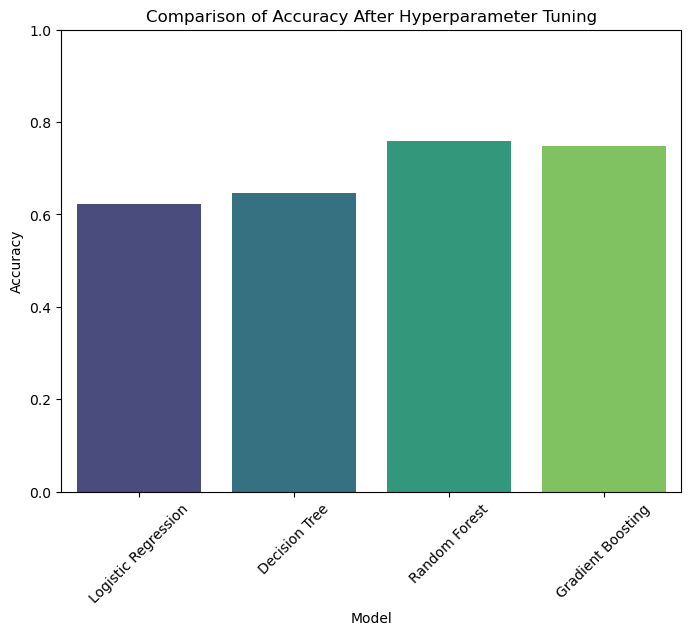

/var/folders/9n/q66b3sm128dc1lgchwd8mb280000gn/T/ipykernel_7767/1229346795.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


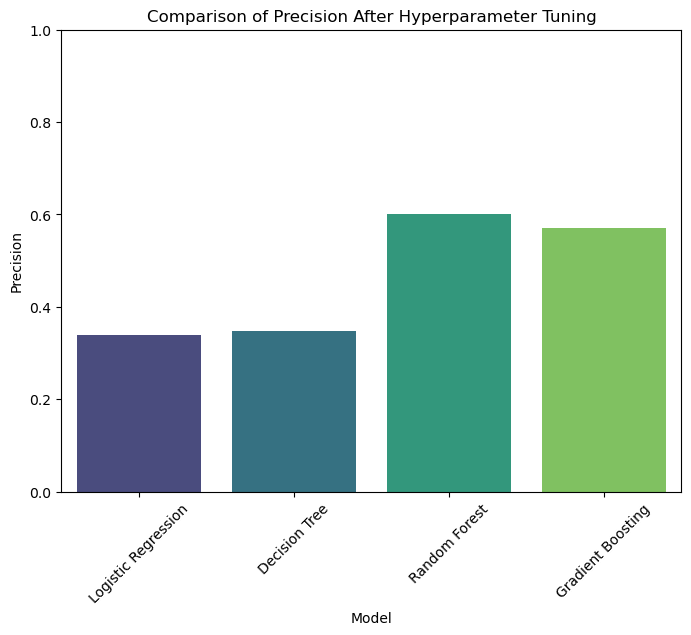

/var/folders/9n/q66b3sm128dc1lgchwd8mb280000gn/T/ipykernel_7767/1229346795.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


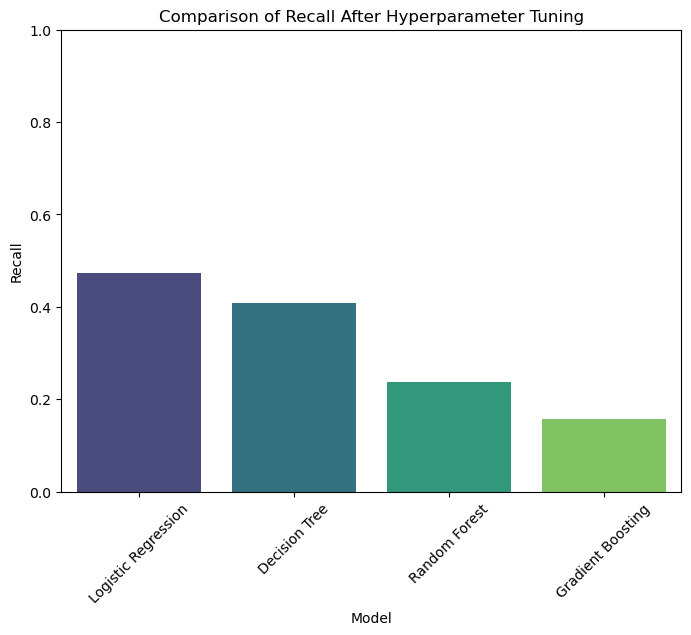

/var/folders/9n/q66b3sm128dc1lgchwd8mb280000gn/T/ipykernel_7767/1229346795.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


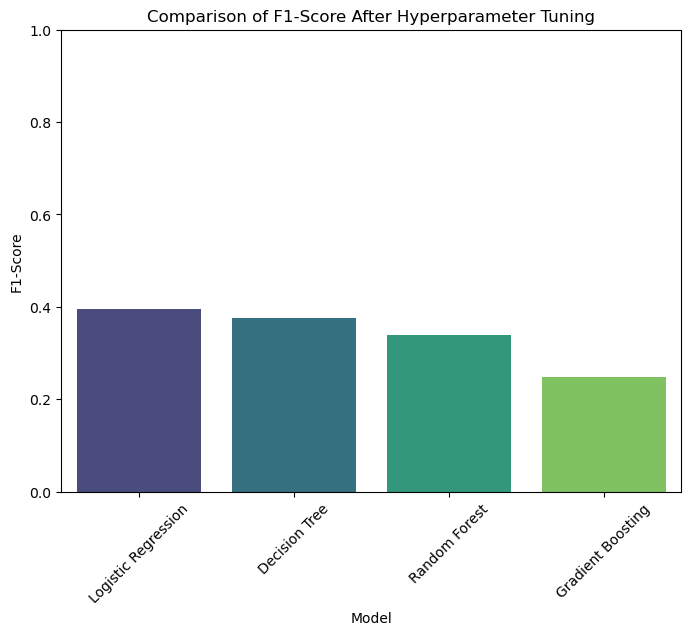

/var/folders/9n/q66b3sm128dc1lgchwd8mb280000gn/T/ipykernel_7767/1229346795.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")


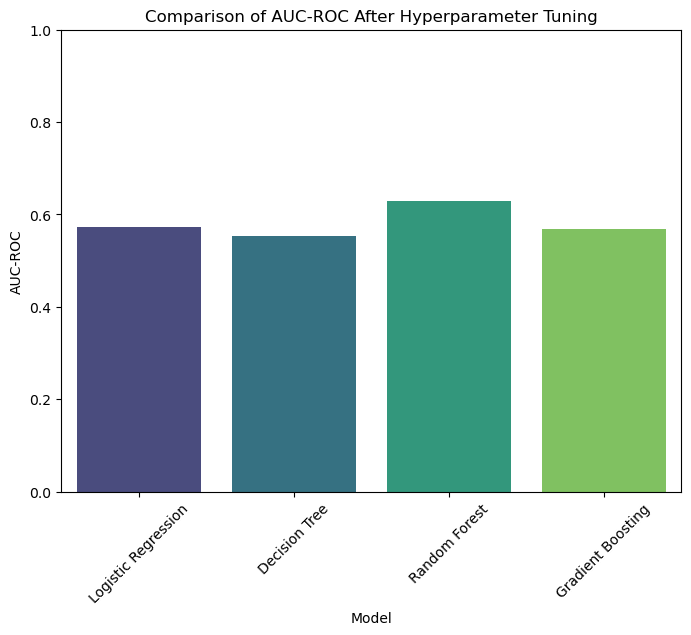

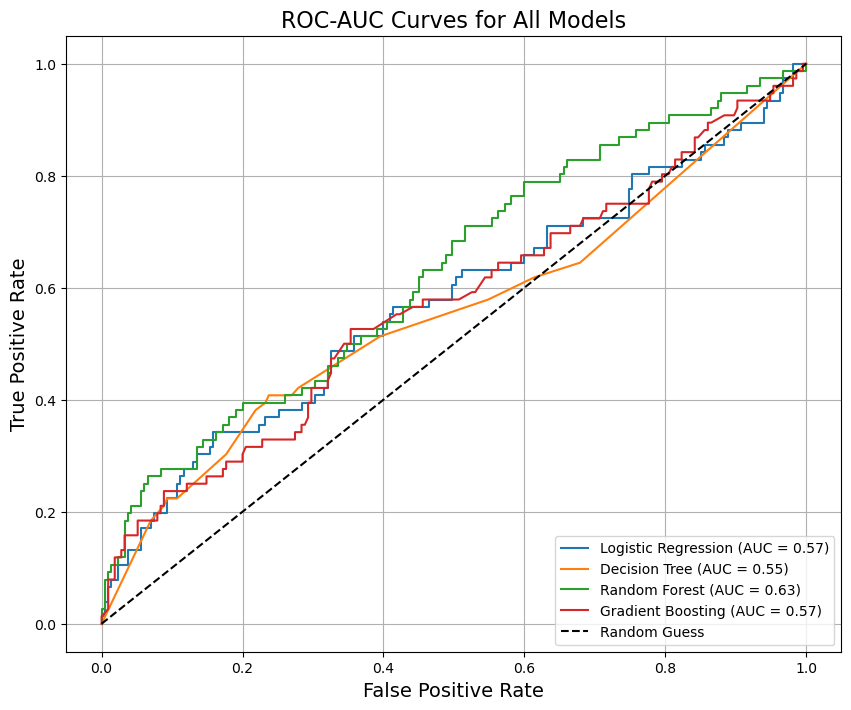

AUC Scores for All Models:
Logistic Regression: 0.57
Decision Tree: 0.55
Random Forest: 0.63
Gradient Boosting: 0.57


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation
# Separate the 'Client' column to keep it for later
client_column = df_for_modelCC['Client']
df = df_for_modelCC.drop(columns=['Client'])  # Drop 'Client' for training


# Separate features and target
X = df[top_features] # Features
y = df['Sale_CC']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Train Multiple Classification Algorithms
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced'),
    #"Support Vector Machine": SVC(probability=True, random_state=42,class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42,class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42,class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Step 3: Hyperparameter Tuning
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["lbfgs", "liblinear"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10]
    }
}

best_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring="roc_auc", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best AUC-ROC for {model_name}: {grid_search.best_score_:.4f}\n")

# Step 4: Evaluate Models
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "AUC-ROC": []
}

# Define the custom threshold
custom_threshold = 0.5

for model_name, model in best_models.items():
    # Make predictions
    #y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= custom_threshold).astype(int)  # Apply custom threshold

    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["AUC-ROC"].append(auc_roc)

# Step 5: Display Results
results_df = pd.DataFrame(results)
print("Model Performance After Hyperparameter Tuning:")
print(results_df)

#Picking Best Model
best_model_name = results_df.loc[results_df['AUC-ROC'].idxmax(), 'Model']
best_model = best_models[best_model_name]

# Step 7: Visualize Results
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.title(f"Comparison of {metric} After Hyperparameter Tuning")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()
    
#Plot AUC-ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dictionary to store AUC scores for all models
auc_scores = {}

# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 8))

for model_name, model in best_models.items():
    # Predict probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1
    
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Calculate the AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_prob)
    auc_scores[model_name] = auc_roc
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_roc:.2f})")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, title, and legend
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC-AUC Curves for All Models", fontsize=16)
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Display AUC scores for all models
print("AUC Scores for All Models:")
for model_name, auc in auc_scores.items():
    print(f"{model_name}: {auc:.2f}")

## Selecting the Best Model in terms of AUC and F1-Score

In [18]:
print(best_model_name)

Random Forest


In [11]:
df_without_revenue_salesCC.columns

Index(['Count_SA', 'Count_MF', 'Count_CC', 'Count_CL', 'Log_ActBal_CA',
       'Log_ActBal_SA', 'Log_ActBal_MF', 'Log_ActBal_CC', 'Log_ActBal_CL',
       'Log_ActBal_OVD', 'Log_VolumeCred_CA', 'Log_TransactionsDebCash_Card',
       'Log_TransactionsDebCashless_Card', 'Log_TransactionsDeb_PaymentOrder',
       'Cred_Deb_Ratio', 'Trans_Cred_Deb_Ratio', 'ActBal_CA_SA_Ratio',
       'Count_CA_Missing', 'VolumeDeb_Missing', 'ActBal_CA_Missing',
       'ActBal_MF_Missing', 'ActBal_OVD_Missing', 'Sex_M', 'Age_Bin_25-45',
       'Age_Bin_45-65', 'Age_Bin_65 & Above', 'Tenure_Bin_Medium-Low',
       'Tenure_Bin_Medium-High', 'Tenure_Bin_High', 'Client', 'Sale_CC',
       'Revenue_CC'],
      dtype='object')

## Predicting Propensity to Buy Credit Card  using the best model and Imputing Revenue (Unlabelled Dataset using Median of Actual Revenue of Customers with SalesTarget=1)

In [19]:
import numpy as np
import pandas as pd

#Using Logistic Regression Model
best_model_manual=best_models['Random Forest']
X = df_without_revenue_salesCC[top_features]

df_without_revenue_salesCC['Predicted_Probability_Sale_CC'] = best_model_manual.predict_proba(X)[:, 1]

# Predict the class (Sale_CC = 0 or 1)
df_without_revenue_salesCC['Predicted_Sale_CC'] = best_model_manual.predict(X)

# Step 3: Calculate Median Revenue_CC for Clients with Sale_CC=1
median_revenue_cc = df_without_revenue_salesCC[df_without_revenue_salesCC['Sale_CC'] == 1]['Revenue_CC'].median()
print(f"Median Revenue_CC for clients with Sale_CC=1: {median_revenue_cc:.5f}")

# Step 4: Assign Median Revenue_CC to Customers with Predicted_Sale_CC=1 and Revenue_CC=NaN
df_without_revenue_salesCC.loc[
    (df_without_revenue_salesCC['Predicted_Sale_CC'] == 1) & (df_without_revenue_salesCC['Revenue_CC'].isna()),
    'Revenue_CC'
] = median_revenue_cc

# Step 5: Display Results
# Display the first few rows of the updated DataFrame
print(df_without_revenue_salesCC[['Client', 'Sale_CC','Predicted_Probability_Sale_CC', 'Predicted_Sale_CC', 'Revenue_CC']].head())

# Save the updated DataFrame to a CSV file (optional)
df_without_revenue_salesCC[['Client', 'Sale_CC','Predicted_Probability_Sale_CC', 'Predicted_Sale_CC', 'Revenue_CC']].to_csv('../ModelOutput/CC_predictions.csv', index=False)

Median Revenue_CC for clients with Sale_CC=1: 4.37696
   Client  Sale_CC  Predicted_Probability_Sale_CC  Predicted_Sale_CC  \
0       1      0.0                       0.600879                1.0   
1       2      0.0                       0.652222                1.0   
2       3      NaN                       0.507355                1.0   
3       4      NaN                       0.550932                1.0   
4       5      NaN                       0.668801                1.0   

   Revenue_CC  
0    0.000000  
1    0.000000  
2    4.376964  
3    4.376964  
4    4.376964  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
